**`COPYRIGHT(C) 2023 THE CYBER UNIVERSITY OF KOREA ALL RIGHTS RESERVED.`**

본 파일의 외부 배포를 금지합니다.

# 1번과제 - position regression 2.0 (50점)  

**템플릿 A**

100%|██████████| 2000/2000 [00:00<00:00, 332090.58it/s]


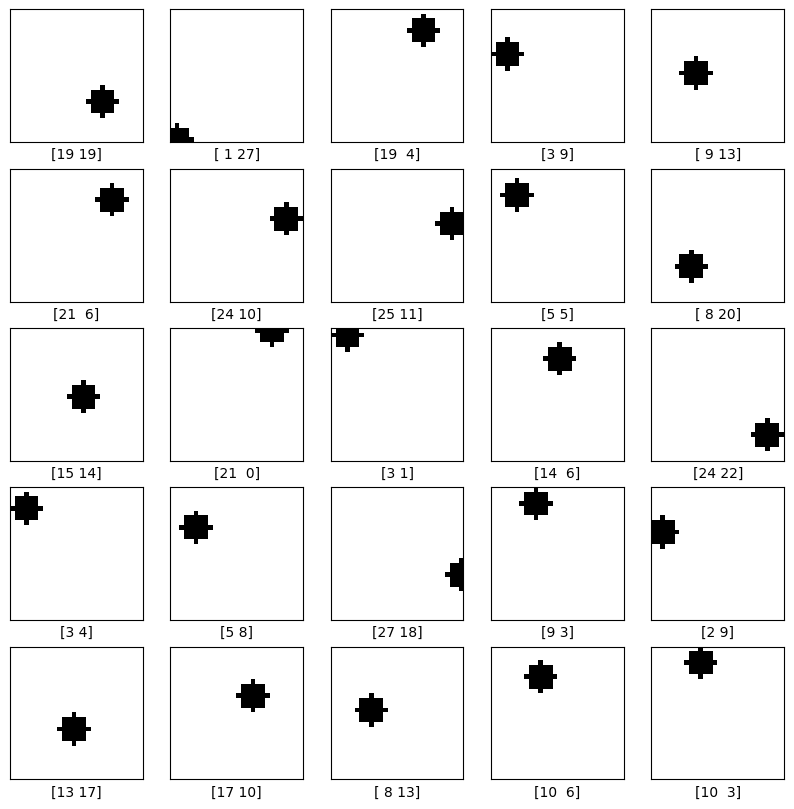

Epoch 1/400
50/50 [==============================] - 1s 7ms/step - loss: 163.7665 - pos_accuracy: 0.0031 - val_loss: 44.6190 - val_pos_accuracy: 0.0120
Epoch 2/400
50/50 [==============================] - 0s 2ms/step - loss: 37.2295 - pos_accuracy: 0.0069 - val_loss: 30.0326 - val_pos_accuracy: 0.0216
Epoch 3/400
50/50 [==============================] - 0s 2ms/step - loss: 28.7347 - pos_accuracy: 0.0231 - val_loss: 23.1467 - val_pos_accuracy: 0.0457
Epoch 4/400
50/50 [==============================] - 0s 2ms/step - loss: 19.9496 - pos_accuracy: 0.0381 - val_loss: 14.0639 - val_pos_accuracy: 0.0601
Epoch 5/400
50/50 [==============================] - 0s 2ms/step - loss: 10.1770 - pos_accuracy: 0.0744 - val_loss: 6.7402 - val_pos_accuracy: 0.1178
Epoch 6/400
50/50 [==============================] - 0s 2ms/step - loss: 4.8799 - pos_accuracy: 0.1456 - val_loss: 4.0734 - val_pos_accuracy: 0.1466
Epoch 7/400
50/50 [==============================] - 0s 2ms/step - loss: 3.1619 - pos_accuracy: 

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 재현 가능한 난수 생성
np.random.seed(0)
tf.keras.utils.set_random_seed(0)


#tf.random.set_seed(0)

def load_data():
    n = 2000
    split = 0.8
    n_train = (int)(split * n)

    y = np.random.randint(28, size=(n, 2))
    x = np.empty((n, 28, 28))

    for i in tqdm(range(n)):
        img = np.zeros((28, 28))
        cv2.circle(img, (y[i][0], y[i][1]), 3, 255, -1)
        x[i] = img
    return ((x[:n_train], y[:n_train]), (x[n_train:], y[n_train:]))


def label(y):
    return np.around(y).astype('int')


(x_train, y_train), (x_test, y_test) = load_data()

# normalize image
x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(label(y_test[i])))
plt.show()


def pos_accuracy(y_true, y_pred):
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    is_correct = tf.cast(is_correct, 'float32')
    score = tf.reduce_mean(is_correct)
    return score


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation=None)
])

model.compile(optimizer=SGD(learning_rate=0.001), loss='mse', metrics=[pos_accuracy])

# 이 자리에 LrReducer snippet을 추가합니다.
# def LrReducer():
#    ...
# lrreducer = LrReducer()

# 이 자리에 ModelCheckpoint snippet을 추가합니다.

n_batch = 32
n_epochs = 400

# 1. model.fit의 반환 결과를 history 변수에 저장합니다.
# 2. lrreducer callback을 추가합니다.
# 3. checkpoint callback을 추가합니다.
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=n_batch,
    epochs=n_epochs,
)

# 여기에 저장된 weights를 loading하는 코드를 추가합니다.

# 여기에 Graph snippet 코드를 추가합니다.

# LrReducer 중 patience의 역할은 무엇입니까?
ans01 = """
여기에 적어주세요.
"""

# LrReducer 중 reduce_rate의 역할은 무엇입니까?
ans02 = """
여기에 적어주세요.
"""

# LrReducer 중 reduce_nb의 역할은 무엇입니까?
ans03 = """
여기에 적어주세요.
"""

#  4주차 과제와 차이가 발생하였는지에 대해, 여기에 결과와 이유를 적어봅시다.
#  주의: 아래의 코드 중 """으로 둘러져있는 것은 python에서 여러줄의 텍스트를 string으로 지정하는 문법입니다. 이 문법을 유지하면서 내용을 적어주세요
ans04 = """
결과: 4주차 과제에서는 val_pos_accuracy가 0.000 이었다.
이유: ???????? 라고 생각한다.
"""

# 모델을 ans02 변수에 기록합니다.
ans05 = model

# 모델의 성능 측정
val_loss, val_pos_accuracy = model.evaluate(x_test, y_test)
print('val_loss =', val_loss, 'val_pos_accuracy =', val_pos_accuracy)

# val_loss의 저장
ans06 = val_loss
ans07 = val_pos_accuracy

# Fully connnected Net의 경우와 ConvNet의 검증셋 성능 차이에 대해 그 이유를 추정해 봅시다.
ans08 = """
여기에 적어주세요.
"""

# ans09는 내용 중복으로 삭제하였습니다. 답변 작성이 필요없습니다.
ans09 = ""

이번 과제는 4주차 과제중 하나인 position regression을 개선하는 것입니다.  
기본 소스에 대한 설명은 4주차 과제에 있으니, 필요하신 분들은 다시 다운로드 받아서 읽어봐 주십시오.  

이 과제는 컨볼루션 신경망의 좋은 성능을 확인해 볼 수 있는 예제라고 하겠습니다.  
Epoch에 따른 손실함수와 정확도의 추이를 볼 수 있는 그래픽 출력을 추가하였습니다.  
또한, LrReducer 콜백 함수를 통하여 learning rate를 자동적으로 조절하는 기능을 추가하였습니다.  
따라서 이번 과제에서는 learning rate의 조절은 필요없습니다.  
가장 높은 성능에서 모델의 weights를 저장하는 콜백 기능도 추가 되었습니다.  
이 기능까지를 추가하고 나면 FC(fully connected) 모델의 성능을 확인하고 이전 과제와 비교해 보시면 됩니다.  
마지막으로는 코드를 컨볼루션 신경망으로 전환하고 튜닝하여 그 차이를 확인해 보도록 하겠습니다.  


1. history의 저장

   loss와 pos_accuracy를 그래프로 그리기 위해서 model.fit의 결과를 history변수로 먼저 저장합니다.  
   ```python
   history = model.fit( ... )
   ```

2. Learning Rate Reducer callback의 추가

   템플릿에서 learning rate는 0.001로 시작하였습니다.  
   학습이 진행되면 더이상 검증셋의 정확도(여기서는 val_pos_accuracy)가 증가하지 않을 수 있습니다.  
   이때에는 fine tuning을 위하여 learning rate를 점차적으로 줄여줄 필요가 있습니다.  
   다음의 callback 함수 snippet을 이용합니다.  
   **LrReducer snippet:**  
   ```python
   class LrReducer(Callback):
       def __init__(self, patience=5, reduce_rate=0.5, reduce_nb=5, verbose=1):
           super(Callback, self).__init__()
           self.patience = patience
           self.wait = 0
           self.best_score = -1.
           self.reduce_rate = reduce_rate
           self.current_reduce_nb = 0
           self.reduce_nb = reduce_nb
           self.verbose = verbose

       def on_epoch_end(self, epoch, logs={}):
           current_score = logs.get('val_pos_accuracy')
           if current_score > self.best_score:
               self.best_score = current_score
               self.wait = 0
               if self.verbose > 0:
                   print('---current best score: %.3f' % current_score)
           else:
               if self.wait >= self.patience:
                   self.current_reduce_nb += 1
                   if self.current_reduce_nb <= self.reduce_nb:
                       lr = keras.backend.get_value(self.model.optimizer.lr)
                       keras.backend.set_value(self.model.optimizer.lr, lr*self.reduce_rate)
                       self.wait = 0
                       if self.verbose > 0:
                           print('---lr decreasing: %e' % (lr*self.reduce_rate))
                   else:
                       if self.verbose > 0:
                           print("Epoch %d: early stopping" % (epoch))
                       self.model.stop_training = True
               self.wait += 1
   lrreducer = LrReducer(patience=20)
   ```
   callback 함수를 이용하기 위해서는 다음과 같이 model.fit을 수정합니다.
   ```python
   history = model.fit(
       x_train, y_train,
       validation_data=(x_test, y_test),
       batch_size=n_batch,
       epochs=n_epochs,
       callbacks = [lrreducer]
   )
   ```
   실행을 해보고 정상적으로 동작하는 지 확인합시다.
   LrReducer callback함수는 학습의 매 epoch이 끝날 때마다 호출됩니다.  
   LrReducer의 소스를 읽고 그 원리를 파악합니다.  
   `patience` 설정 값은 어떤 역할을 합니까? `ans01`에 적어주세요.  
   `reduce_rate`(감소율)의 설정 값은 어떤 역할을 합니까? `ans02`에 적어주세요.  
   `reduce_nb`(감소 수)의 설정 값은 어떤 역할을 합니까? `ans03`에 적어주세요.  

3. checkpoint callback의 추가  
   이번에는 `val_pos_accuracy`가 최고점을 갱신하면 자동으로 모델의 weights를 저장하도록 callback을 추가합니다.  
   **ModelCheckpoint snippet:**  
   ```python
   checkpoint = keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_pos_accuracy', verbose=1,
       save_best_only=True, mode='auto', save_freq="epoch")
   ```
   callback 사용을 위하여 최종적인 `model.fit`을 다음과 같이 한번 더 수정합니다.
   ```python
   history = model.fit(
       x_train, y_train,
       validation_data=(x_test, y_test),
       batch_size=n_batch,
       epochs=n_epochs,
       callbacks = [lrreducer, checkpoint] # 두 가지의 callback 모두 사용
   )
   ```

4. 학습이 끝난 후에 저장한 weights를 다시 loading하여 불러오는 코드를 `model.fit` 호출 다음에 추가합니다.  
   최고 `val_pos_accuracy`가 저장되어 있을 것입니다.  
   ```python
   model.load_weights("best_model.h5")
   ```

5. 이제 저장된 history를 이용하여 학습이 완료된 후 그래프를 출력합니다.  
   다음의 코드 snippet을 이용합니다.  
   **Graph snippet**  
   ```python
   # 학습 정확성 값과 검증 정확성 값을 그래프로 그립니다.
   plt.plot(history.history['pos_accuracy'])
   plt.plot(history.history['val_pos_accuracy'])
   plt.title('Model pos_accuracy')
   plt.ylabel('Pos_accuracy')
   plt.xlabel('Epoch')
   plt.legend(['Train', 'Test'], loc='upper left')
   plt.show()
   # Loss의 그래프
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('Model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.ylim(0.0,1.0)
   plt.legend(['loss', 'val_loss'], loc='upper left')
   plt.show()
   ```

6. 이제 검증셋의 `val_loss`와 `val_pos_accuracy`를 확인해 봅시다.  
   아래의 코드는 이미 템플릿에 포함되어 있으므로 별도의 수정이 필요없습니다.  
   ```python
   val_loss, val_pos_accuracy = model.evaluate(x_test, y_test)
   print('val_loss =', val_loss, 'val_pos_accuracy =', val_pos_accuracy)
   ```

7. 결과의 분석  
   이 모델의 목표였던 `val_pos_accuracy`는 약 0.88입니다. (물론 Dense모델 만으로도 더 높은 성능도 가능합니다.)    
   이제 이 결과를 4주차 과제였던 여러분의 모델과 비교해 봅시다.  
   (4주차 과제에서 `val_pos_accuracy` 대신에 `val_accuracy`를 측정했던 분들은 코드를 수정하여 다시 확인해 봅시다.)  
   정확도(val_pos_accuracy)를 비교해 보니까 어떻습니까?  
   여러분이 4주차에 만들었던 모델과 성능차이가 있다면, 어떤 부분에서 차이가 났는지에 대해 간단히 추정해 봅시다.  
   추정한 내용을 `ans04`에 적어봅시다.  

8. CNN으로의 전환  
   이제 모델 정의 부분을 ConvNet으로 변경하여 봅시다.  
   학습 속도가 느리다면, 런타임 -> 런타임 유형변경 -> GPU로 변경하여 봅시다.  
   ```python
   model = keras.Sequential([
       # 이 부분은 수정하지 않도록 합시다.
       keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),

       # 다음은 첫번째 레이어의 예제입니다. 여러분이 수정해야 할 것은 이 레이어부터입니다.
       keras.layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
       # ... 중간에 여러개의 다른 레이어를 추가해 봅시다.
       # ...

       # 이 부분은 수정하지 않도록 합시다.
       keras.layers.Flatten(),
       keras.layers.Dense(2, activation=None)
   ])
   ```
   맨 처음 `Reshape`부분은 Conv2D를 위하여 채널을 추가하기 위한 것입니다. (수정하지 않도록 합시다.)  
   맨 마지막 `Flatten`과 `Dense` 레이어는 x,y좌표의 결과 출력을 위한 것입니다. (이 코드는 수정하지 않도록 합시다.)  
   `Reshape`과 `Flatten`사이에 복수개의 Conv2D 레이어를 추가합니다.  
   이 부분에서는 다음의 하이퍼 파라미터를 조절할 수 있습니다.  
   먼저 Conv2D의 레이어 갯수입니다.  
   다음은 각 Conv2D 레이어의 필터 수 입니다.  
   다음은 `padding`입니다. `same` or `valid` 중에 적절한 것을 선택합니다. (레이어마다 달라도 관계없습니다.)  
   `Conv2D`의 활성함수는 `relu`나 `sigmoid` 등을 사용하도록 합시다.  
   (`mish` 등 다른 활성함수를 사용하셔도 무방합니다.)  
   kernel size는 모두 3x3으로 고정합니다.
   maxpool2d 레이어도 사용하실 수 있습니다.  
    
   목표는 성능 최적화, 즉, `val_pos_accuracy`를 최대화 하는 것입니다.  
   성능이 만족되면, 성능을 유지하도록 하면서 총 parameter의 수를 줄이도록 노력해 봅시다.  
   model.summary()를 이용하여 parameter의 수를 확인해 봅시다.  
   각 레이어의 parameter의 수를 손으로 직접 계산하여 model.summary()의 출력과 일치하는 지 비교해 봅시다.  
   optimizer는 SGD를 사용하여도되고 Adam으로 변경하셔도 됩니다. (Adam의 경우 더 높은 성능이 나오는 지 확인하여 봅시다.)  
    
   완성된 모델을 `ans05` 변수에 기록합니다.  (이미 템플릿 코드에 포함되어 있으므로, 별도의 수정이 필요없습니다.)  
   `val_loss`와 `val_pos_accuracy`를 각각 `ans06`과 `ans07`에 기록합니다.  (이미 템플릿 코드에 포함되어 있습니다.)  
    
   처음에 수행한 FC 네트워크와 ConvNet의 검증셋 성능을 비교해서 성능의 증가 여부와, 그 이유를 추정해 봅시다.
   중요한 것은 학습셋(training set)의 성능은 98%-99% 정도로 두 네트워크 다 높다는 것입니다.  
   하지만 테스트셋(혹은 검증셋)에서는 차이가 발생할 것입니다.  
   왜 그럴까요?  
   차이의 이유를 추정해서 `ans08`에 기입합니다.

   `ans09`는 질문 중복으로 삭제하였습니다. 무시하시면 됩니다.

9. 과제의 목적  
   이 과제는 여러분이 ConvNet을 구성하고 그 Hyper parameter를 튜닝해 봄으로서 성능을 극대화하고, 모델을 최적화하는 것이 어떤 것인지를 맛볼 수 있는 toy 예제입니다.  
   여기에 정답이란 것이 있을까요?  
   여러분은 끊임없이 내가 만든 모델의 `val_pos_accuracy`가 정말 더이상 높일 수 없을 정도인지를 의심하게 될 것입니다.  
   이 의구심을 갖고 이것을 개선하려고 노력하는 것이 이 과제의 주된 목적입니다.  
   더이상 성능개선이 이루어 지지 않으면, 동일한 성능에서 학습 parameter의 수를 줄여보려 노력하는 것이 두번째 목적입니다.  

**과제 기입란**  
최종 코드는 모든 수정사항이 반영된 ConvNet이어야 합니다.

100%|██████████| 2000/2000 [00:00<00:00, 306859.13it/s]


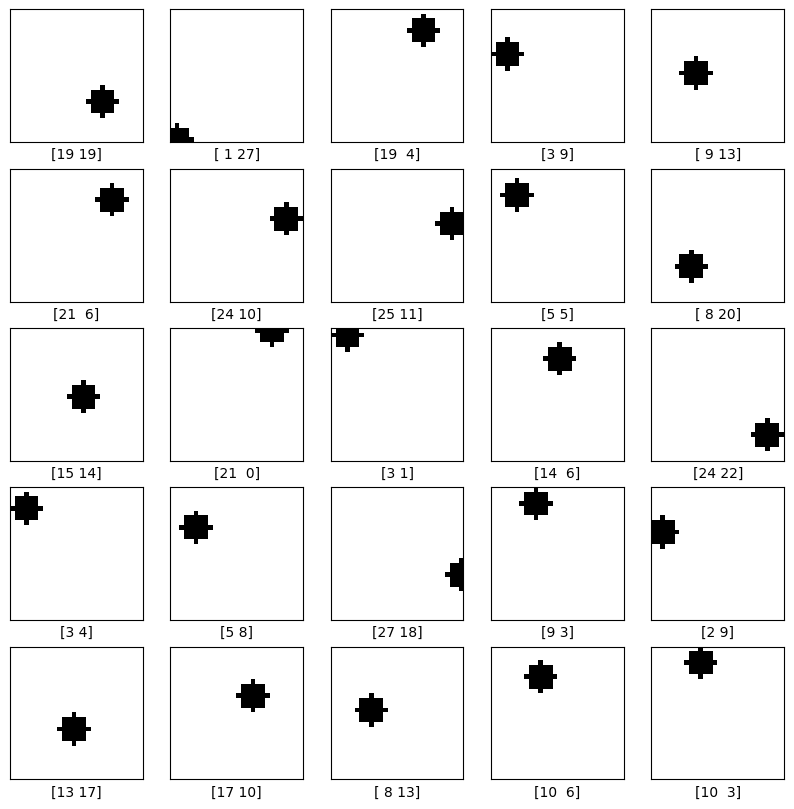

Epoch 1/400
50/50 [==============================] - ETA: 0s - loss: 118.2568 - pos_accuracy: 0.0025---current best score: 0.000

Epoch 1: val_pos_accuracy improved from -inf to 0.00000, saving model to best_model.h5
50/50 [==============================] - 3s 56ms/step - loss: 118.2568 - pos_accuracy: 0.0025 - val_loss: 24.4725 - val_pos_accuracy: 0.0000e+00
Epoch 2/400
50/50 [==============================] - ETA: 0s - loss: 12.5993 - pos_accuracy: 0.0319---current best score: 0.041

Epoch 2: val_pos_accuracy improved from 0.00000 to 0.04087, saving model to best_model.h5
50/50 [==============================] - 3s 55ms/step - loss: 12.5993 - pos_accuracy: 0.0319 - val_loss: 8.5594 - val_pos_accuracy: 0.0409
Epoch 3/400
50/50 [==============================] - ETA: 0s - loss: 5.1014 - pos_accuracy: 0.0981---current best score: 0.058

Epoch 3: val_pos_accuracy improved from 0.04087 to 0.05769, saving model to best_model.h5
50/50 [==============================] - 3s 54ms/step - loss: 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 재현 가능한 난수 생성
np.random.seed(0)
tf.keras.utils.set_random_seed(0)


#tf.random.set_seed(0)

def load_data():
    n = 2000
    split = 0.8
    n_train = (int)(split * n)

    y = np.random.randint(28, size=(n, 2))
    x = np.empty((n, 28, 28))

    for i in tqdm(range(n)):
        img = np.zeros((28, 28))
        cv2.circle(img, (y[i][0], y[i][1]), 3, 255, -1)
        x[i] = img
    return ((x[:n_train], y[:n_train]), (x[n_train:], y[n_train:]))


def label(y):
    return np.around(y).astype('int')


(x_train, y_train), (x_test, y_test) = load_data()

# normalize image
x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(label(y_test[i])))
plt.show()


def pos_accuracy(y_true, y_pred):
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    is_correct = tf.cast(is_correct, 'float32')
    score = tf.reduce_mean(is_correct)
    return score


model = keras.Sequential([
    # 이 부분은 수정하지 않도록 합시다.
    keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),

    # 다음은 첫번째 레이어의 예제입니다. 여러분이 수정해야 할 것은 이 레이어부터입니다.
    keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),

    # ... 중간에 여러개의 다른 레이어를 추가해 봅시다.
    # ...

    # 이 부분은 수정하지 않도록 합시다.
    keras.layers.Flatten(),
    keras.layers.Dense(2, activation=None)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[pos_accuracy])


# 이 자리에 LrReducer snippet을 추가합니다.
class LrReducer(Callback):
    def __init__(self, patience=5, reduce_rate=0.5, reduce_nb=5, verbose=1):
        super(Callback, self).__init__()
        self.patience = patience
        self.wait = 0
        self.best_score = -1.
        self.reduce_rate = reduce_rate
        self.current_reduce_nb = 0
        self.reduce_nb = reduce_nb
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current_score = logs.get('val_pos_accuracy')
        if current_score > self.best_score:
            self.best_score = current_score
            self.wait = 0
            if self.verbose > 0:
                print('---current best score: %.3f' % current_score)
        else:
            if self.wait >= self.patience:
                self.current_reduce_nb += 1
                if self.current_reduce_nb <= self.reduce_nb:
                    lr = keras.backend.get_value(self.model.optimizer.lr)
                    keras.backend.set_value(self.model.optimizer.lr, lr * self.reduce_rate)
                    self.wait = 0
                    if self.verbose > 0:
                        print('---lr decreasing: %e' % (lr * self.reduce_rate))
                else:
                    if self.verbose > 0:
                        print("Epoch %d: early stopping" % (epoch))
                    self.model.stop_training = True
            self.wait += 1


lrreducer = LrReducer(patience=20)

# 이 자리에 ModelCheckpoint snippet을 추가합니다.
checkpoint = keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_pos_accuracy', verbose=1,
                                             save_best_only=True, mode='auto', save_freq="epoch")
n_batch = 32
n_epochs = 400

# 1. model.fit의 반환 결과를 history 변수에 저장합니다.
# 2. lrreducer callback을 추가합니다.
# 3. checkpoint callback을 추가합니다.
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=n_batch,
    epochs=n_epochs,
    callbacks=[lrreducer, checkpoint]
)

# 여기에 저장된 weights를 loading하는 코드를 추가합니다.

# 여기에 Graph snippet 코드를 추가합니다.

# LrReducer 중 patience의 역할은 무엇입니까?
ans01 = """
patience는 주어진 코드에서 val_pos_accuracy에서 개선이 없는 연속된 에포크 수를 나타내는 매개변수입니다.
"""

# LrReducer 중 reduce_rate의 역할은 무엇입니까?
ans02 = """
reduce_rate는 학습률을 얼마나 감소시킬지를 결정하는 매개변수
"""

# LrReducer 중 reduce_nb의 역할은 무엇입니까?
ans03 = """
reduce_nb는 학습률을 얼마나 자주 감소시킬 것인지를 결정하는 매개변수입니다. 이 매개변수는 학습률을 감소시키는 횟수를 제한하는 역할
"""

#  4주차 과제와 차이가 발생하였는지에 대해, 여기에 결과와 이유를 적어봅시다.
#  주의: 아래의 코드 중 """으로 둘러져있는 것은 python에서 여러줄의 텍스트를 string으로 지정하는 문법입니다. 이 문법을 유지하면서 내용을 적어주세요
ans04 = """
결과: 4주차 과제에서는 val_pos_accuracy가 0.9449999928474426 이었다.
이유: 4주차 과제에서는 학습률을 감소시키는 코드가 없었기 때문에 학습률이 너무 커서 학습이 잘 되지 않았다고 생각한다.
다만 여기까지에서는 4주차가 더 높은 수치가 나왔던 이유는 패러미터 튜닝과, 좋은결과를 내기위해 우연의 요소에 기대어 오랜시간을 쏟은 결과라고 할수있습니다.
"""

# 모델을 ans02 변수에 기록합니다.
ans05 = model

# 모델의 성능 측정
val_loss, val_pos_accuracy = model.evaluate(x_test, y_test)
print('val_loss =', val_loss, 'val_pos_accuracy =', val_pos_accuracy)

# val_loss의 저장
ans06 = val_loss
ans07 = val_pos_accuracy

# Fully connnected Net의 경우와 ConvNet의 검증셋 성능 차이에 대해 그 이유를 추정해 봅시다.
ans08 = """
FC모델은 4주차 과제에서 val_pos_accuracy가 0.9449999928474426 이었는데, ConvNet은 0.995192289352417 이었다.
이유는 ConvNet은 이미지의 특징을 추출하는 Conv2D 레이어를 사용했기 때문이라고 생각한다.
"""

# ans09는 내용 중복으로 삭제하였습니다. 답변 작성이 필요없습니다.
ans09 = ""


# 2번과제 - 객체 탐지의 성능 측정 (50점)

**템플릿 B**

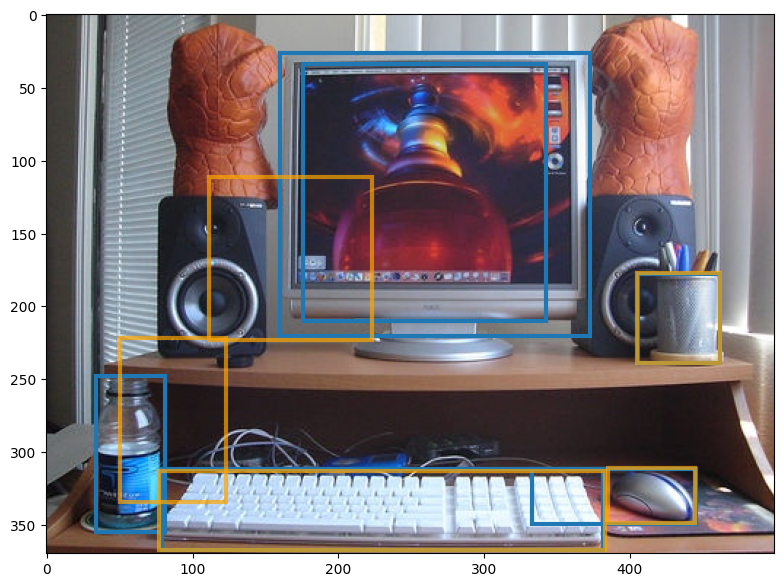

sorted tp = [1 1 0 0 1 0]
sorted fp = [0 0 1 1 0 1]
prec = [1.         1.         0.66666667 0.5        0.6        0.5       ]
rec = [0.2 0.4 0.4 0.4 0.6 0.6]
ap = 0.52


In [11]:
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib import patches
import numpy as np

# YOLO의 객체 탐지 추론 결과 (coco dataset 기준)
# data/VOC2012/JPEGImages/2007_000559.jpg 이미지의 YOLO 추론 결과
pred_class = ['person', 'mouse', 'keyboard', 'bottle', 'cup', 'tvmonitor']

# 실제 추론결과에 맞도록 데이터를 수정하세요.
confidence = np.array([0.11111111, 0.9976528, 0.9980576, 0.9573481, 0.49765933, 0.9629159])
pred_box = np.array(
    [[176.16505921, 33.64296697, 341.38774166, 208.91536349],
     [333.33333333, 311.9840765, 444.85818948, 348.11093758],
     [79.10724729, 311.60360575, 380.4496864, 366.52458648],
     [33.86356309, 247.92885244, 79.78276448, 354.13598821],
     [405.60171008, 177.75161535, 461.23234462, 238.10186431],
     [159.76904333, 26.10973097, 371.53357512, 219.45996917]]
)

ans10 = confidence[0]
ans11 = pred_box[1][0]

# data/VOC2012/JPEGImages/2007_000559.jpg 이미지의 Ground Truth
y_class = ['bottle', 'tvmonitor', 'keyboard', 'cup', 'mouse']
y_box = np.array(
    [[111, 111, 222, 222],  # bottle 이 부분을 수정하세요
     [50, 222, 122, 333],  # tvmonitor 이 부분을 수정하세요
     [77, 313, 382, 366],  # keyboard
     [405, 177, 461, 238],  # cup
     [385, 311, 444, 348]]  # mouse
    , dtype='float64'
)

ans12 = y_box[0:2]

img_url = 'https://user-images.githubusercontent.com/38934308/141396886-34953093-8fb6-4984-a0e9-3598ba802828.jpg'
img_path = keras.utils.get_file("2007_000559.jpg", img_url)
image = mp_image.imread(img_path)
fig, ax = plt.subplots(figsize=(10, 7))
for box in pred_box:
    ax.add_patch(patches.Rectangle(
        (box[0], box[1]), box[2] - box[0] + 1, box[3] - box[1] + 1,
        edgecolor='tab:blue', linewidth=3,
        fill=False
    ))
for box in y_box:
    ax.add_patch(patches.Rectangle(
        (box[0], box[1]), box[2] - box[0] + 1, box[3] - box[1] + 1,
        edgecolor='orange', linewidth=3, alpha=0.7,
        fill=False
    ))
plt.imshow(image)
plt.show()


# 두 개의 bounding box의 iou 계산
def bbox_iou(box1, box2):
    # box의 넓이 계산: area = w * h
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # 교집합 box의 upper-left 좌표
    left_up = np.maximum(box1[:2], box2[:2])
    # 교집합 box의 lower-right 좌표
    right_down = np.minimum(box1[2:], box2[2:])

    # 교집합 box의 width와 height
    inter_section = np.maximum(right_down - left_up, 0.0)

    # 교집합 box의 넓이: area = w * h
    inter_area = inter_section[0] * inter_section[1]

    # 합집합 면적
    union_area = box1_area + box2_area - inter_area

    # IOU의 산출
    iou = inter_area / union_area
    return iou


# 교집합 box의 upper-left 좌표와 lower-right좌표를 산출하는 원리를 적어주세요.
ans13 = """
여기에 적어주세요.
"""

# 어떤 경우에 right_down - left_up이 음수가 되는 지 확인해 봅시다.
ans14 = """
여기에 적어주세요.
"""

tp = []
for p_c, p_b in zip(pred_class, pred_box):
    tp_tmp = 0
    for y_c, y_b in zip(y_class, y_box):
        if y_c == p_c and bbox_iou(p_b, y_b) > 0.5:
            tp_tmp = 1
            break
    tp.append(tp_tmp)

tp = np.array(tp)
# False Positive
fp = 1 - tp

npos = len(y_box)  # 총 GT의 갯수

# sort by confidence (confidence가 큰 순으로 정렬)
sorted_ind = np.argsort(-confidence)
tp = tp[sorted_ind]
fp = fp[sorted_ind]

print('sorted tp =', tp)
print('sorted fp =', fp)

# 누적 precision recall의 계산
fp = np.cumsum(fp)
tp = np.cumsum(tp)
rec = tp / float(npos)  # 누적 tp를 GT의 갯수로 나눔
prec = tp / (tp + fp)
print('prec =', prec)
print('rec =', rec)


# AP (average precision의 계산)
def voc_ap(rec, prec):
    # 양끝에 시작값과 끝값을 추가한다.
    # X축(recall)은 0과 1사이에 존재해야 하므로 양쪽 끝에 0,1을 추가한다.
    # Y축(precision)은 recall이 1일때 0값을 추가한다. (이것은 면적에 영향을 주지 않는다.)
    # Y축의 시작값은 0을 추가하지만 바로 아래부분의 precision이 항상 감소하도록 해야하는 조건
    # 때문에, 자동으로 변경될 것이다. (시작값은 recision의 최대값으로 변화하게 된다.)
    mrec = np.concatenate(([0.], rec, [1.]))
    mpre = np.concatenate(([0.], prec, [0.]))

    # precision graph가 항상 감소하도록 값을 보정한다.
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # PR 곡선아래의 면적을 계산하기 위해서 X축(recall)이 변화하는 지점을 찾는다.
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # 그리고 다음의 합계를 구한다.
    # sum ( (\Delta recall) * prec )
    # (\Delta recall)이란 X축(recall)에서 recall이 변화하는 양이다.
    # 즉, 직사각형의 밑변의 길이가 된다.
    # 여기에 Y축 높이(precision)값을 곱하면 직사각형의 넓이가 된다.
    # 이것을 모두 합(sum)하면, 그래프 하단의 넓이가 된다.
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


ap = voc_ap(rec, prec)
print('ap =', ap)

ans15 = ap

# 본 과제를 수행한 시간이나 기타 의견 등이 있으시면 적어 주세요. (공란으로 두셔도 됩니다.)
ans16 = """
여기에 적어주세요.
"""

이번에는 YOLO 객체 탐지 모델을 실행하고 성능을 측정하는 과제입니다.  
이번 과제는 길어 보이지만 실제로 코드를 수정하는 부분은 없고, 데이터 부분만 수정하여 구동하는 것과 소스의 분석이 주된 목표입니다.  
이 과제를 통하여 객체탐지의 성능 지표인 mAP에 대한 구성요소를 이해할 수 있을 것입니다.  
(TP, FP, FN의 이해)  
(precision과 recall의 이해)   
(precision-recall graph를 이용한 AP 산출식의 이해)    

1. 샘플 이미지를 이용한 YOLO의 구동

   먼저 **9주차** 실습자료인 `08-voc.ipynb`를 처음부터 실행해봅시다.
    
   과제 노트북에 복사하지 마시고, 반드시 별도 창에서 실행해봐 주십시오.
   **convert YOLOv4 weights to Keras h5** 섹션까지만 실행합니다.  
   (**mAP의 계산** 섹션은 많은 시간이 소요되기 때문입니다.)  

   다음 cell까지 실행하면 성공입니다.  
   ```python
   image = cv2.imread('data/VOC2012/JPEGImages/2007_000187.jpg')
   image, boxes, scores, classes = _decode.detect_image(image, True)
   cv2_imshow(image)
   ```

   이제 이미지의 경로를 다음과 같이 변경하고 실행합니다.
   ```python
   image = cv2.imread('data/VOC2012/JPEGImages/2007_000559.jpg')
   image, boxes, scores, classes = _decode.detect_image(image, True)
   cv2_imshow(image)
   ```

   다음의 이미지가 출력될 것입니다.  

   **그림 1.**  
   ![그림1](https://user-images.githubusercontent.com/38934308/141392547-5fd69ae5-070a-49b9-8207-8ecbb4c2d50d.png)  

   Cell에 다음 코드를 추가하고 실행합니다. (`08-voc.ipynb`에서 수행합니다.)  
   ```python
   class_names = get_class('model_data/coco_classes.txt')
   for c, s in zip(classes, scores):
       print(class_names[c], s)
   print(boxes)
   ```
   그러면 다음과 같은 출력 결과를 얻을 수 있습니다. 소숫점 뒤쪽은 약간의 오차가 있을 수 있습니다.
   (`????`부분은 여러분들이 직접 데이터를 확인해 주세요.)
   ```
   person ?.???????
   mouse 0.9976528
   keyboard 0.9980576
   bottle 0.9573481
   cup 0.49765933
   tvmonitor 0.9629159
   [[176.16505921  33.64296697 341.38774166 208.91536349]
    [???.???????? 311.9840765  444.85818948 348.11093758]
    [ 79.10724729 311.60360575 380.4496864  366.52458648]
    [ 33.86356309 247.92885244  79.78276448 354.13598821]
    [405.60171008 177.75161535 461.23234462 238.10186431]
    [159.76904333  26.10973097 371.53357512 219.45996917]]
   ```
   윗 부분은 각각의 인식 결과와 그 confidence score입니다.  
   아래의 list 부분은 객체의 위치 인식 결과 입니다.  
   위치는 `[xmin, ymin, xmax, ymax]`의 형식입니다.  
   결과부분을 복사하여 메모장에 붙여넣기 해 둡니다.

   이제 템플릿 B의 코드를 복사하신 후, 과제기입란에서 `confidence`와 `pred_box`를 해당 데이터에 맞게 수정합시다.  
   대부분의 값은 템플릿 B에 이미 있습니다.  
   수정할 부분은 `pred_conficence` 중 `0.11111111` 부분과, box 중 `333.33333333` 두 군데 입니다.  
   수정된 결과가 `ans10`와 `ans11`에 저장됩니다. (템플릿에 이미 포함되어 있습니다.)  
   (이 과정은 객체탐지 모델을 구동하고 그 추론결과인 confidence score와 bounding box를 저장하는 것입니다.)

   이제 이 이미지의 annotation 작업물(Ground Truth)을 확인해 보겠습니다.
   (참고: annotation이란 학습을 위해서 미리 참값인 ground truth를 사람이 직접 라벨링하는 작업, 혹은 그 작업의 산출물을 뜻합니다. 다른 말로는 라벨링, 혹은 라벨링 데이터라고도 부릅니다.)

   `08-voc.ipynb`에 cell을 추가하고 다음 명령을 수행해 봅시다.  
   ```
   !cat data/VOC2012/Annotations/2007_000559.xml
   ```
   xml 출력 결과를 복사하여 메모장에 붙여넣기 해주세요.  
   여기까지 끝나셨으면 `08-voc.ipynb` 실습 노트북은 종료하셔도 됩니다.   

   xml 데이터의 내용을 잘 보시면 bottle과 tvmonitor만이 들어있습니다.  
   이것은 80개 class인 coco dataset과 달리, VOC에는 20개의 class 밖에 없기 때문입니다.  
   나머지 객체들은 ground truth에서 빠져있습니다.  
   그래서 keyboard, cup, mouse의 annotation결과는 템플릿 소스코드 y_box에 수동으로 미리 추가해 두었습니다.

   원래 VOC xml 데이터에 있는 bottle과 tvmonitor의 bounding box의 좌표값을 `y_box`에 옮겨서 완성합니다.  
   `y_box` 데이터의 처음 두 줄을 수정하시면 됩니다.  
   (이 과정은 객체탐지의 ground truth를 지정하는 작업입니다.)

   수정된 결과가 `ans12`에 저장됩니다. (템플릿에 이미 포함되어 있습니다.)  

   데이터가 수정되었으면, 정상적으로 실행되는 지 확인해 봅시다.  
   출력된 이미지에서 파란색은 prediction된 결과이고, 주황색은 ground truth입니다.  
   인터넷에서 matplotlib를 이용하여 사각형을 그리는 함수인 `patches.Rectangle`에 대해 검색하고 파라미터의 의미를 이해해 봅시다.  
   파란색 box가 **그림 1**의 box와 일치하는 지 확인합시다.  

2. IOU의 계산  

   다음은 IOU를 계산하는 `bbox_iou`함수입니다.  
   ```python
   # 두 개의 bounding box의 iou 계산
   def bbox_iou(box1, box2): # box1, box2는 [xmin, ymin, xmax, ymax]의 형식
       # box의 넓이 계산: area = w * h
       box1_area = (box1[2]-box1[0])*(box1[3]-box1[1])
       box2_area = (box2[2]-box2[0])*(box2[3]-box2[1])
    
       # 교집합 box의 upper-left 좌표
       left_up = np.maximum(box1[:2], box2[:2])
       # 교집합 box의 lower-right 좌표
       right_down = np.minimum(box1[2:], box2[2:])
    
       # 교집합 box의 width와 height
       inter_section = np.maximum(right_down - left_up, 0.0)
    
       # 교집합 box의 넓이: area = w * h
       inter_area = inter_section[0]*inter_section[1]
    
       # 합집합 면적
       union_area = box1_area + box2_area - inter_area
    
       # IOU의 산출
       iou = inter_area/union_area
       return iou
   ```
   소스 코드를 읽고 이해해 봅시다.  
   코드 중 교집합 box의 좌상위치(`left_up`)과 우하위치(`right_down`)를 계산하는 코드는 다음과 같습니다.  
   ```python
   left_up = np.maximum(box1[:2], box2[:2])
   right_down = np.minimum(box1[2:], box2[2:])
   ```
   위의 코드가 어떻게 교집합의 위치를 추출하는 지를 `ans13`에 적어주세요.  

   교집합 box의 width와 height를 계산하는 코드는 다음과 같습니다.   
   ```python
   right_down - left_up
   ```
   여기서 `right_down`과 `left_up`은 모두 `x,y`의 데이터가 저장된 `(2,)` shape의 텐서입니다.    
   따라서 두 값을 빼면, width와 height가 동시에 생성됩니다.   
   여기에 추가적으로 `np.maximum(..., 0.0)`이 사용되었습니다.  
   즉, width와 height가 음수가 나오면 0으로 변경한다는 의미입니다.  

   어떤 경우에 width혹은 height가 음수가 나오는지 `ans14`에 적어주세요.  

   필요하다면 다음의 디버깅 코드를 이용하여, 실제로 두 box의 값을 변경하면서 IOU가 정상적으로 출력되는 지 확인해 봅시다.  
   ```python
   # IOU 테스트 코드 (이부분의 실험은 별도 cell에서 각자 수행해 보세요.)
   sample_box1 = np.array([0.0, 0.0, 2.0, 2.0])
   sample_box2 = np.array([1.0, 1.0, 3.0, 3.0])
   print(bbox_iou(sample_box1, sample_box2))
   ```

   이 IOU 계산 함수를 `09_yolo.ipynb` 실습 파일 내의 `bbox_iou`함수와 비교하여 봅시다.  
   실습 파일의 bbox_iou는 입력 box의 형식이 중심좌표, w,h의 형식이고 여러개의 box들의 iou를 동시에 계산한다는 점이 다릅니다.  
   (numpy 대신에 tensorflow 텐서 계산 함수가 사용되었습니다.)  
   과제에서 IOU를 계산하는 코드에, if문이나, for문이 사용되지 않았음에 주목합시다.  
   전체를 tensor operation만을 이용하여 해결하였습니다.  
   이것은 더 많은 여러개의 box에 대한 IOU를 동시에 계산하는 코드로 확장할 수 있게 합니다. (10주차 `09_yolo.ipynb`내의 bbox_iou처럼)  
   이와 같은 코드는 확장 가능할 뿐 아니라, GPU에서의 병렬처리 속도를 증가시킵니다.  
   따라서 딥러닝의 핵심 코드(모델, 손실함수) 들은 텐서와 텐서 연산만을 사용하여 처리하는 것이 바람직하다고 하겠습니다.  

3. mAP의 계산 (여기서는 AP까지만 계산합니다.)  
   이제 `tp` (True Positive) 여부를 산정합니다.   
   class가 일치하고 IOU가 0.5이상이면 True Positive로 판정합니다. (VOC의 판정기준을 따랐습니다.)
   ```python
   tp = []
   for p_c, p_b in zip(pred_class, pred_box):
       tp_tmp = 0
       for y_c, y_b in zip(y_class, y_box):
           if y_c == p_c and bbox_iou(p_b, y_b) > 0.5:
               tp_tmp = 1
               break
       tp.append(tp_tmp)
   ```
   YOLO의 추론결과를 보면 `person`이 오인식 되었다는 것을 알 수 있습니다.  
   따라서 `tp` 중 `person`에 해당하는 것은 0이어야 합니다.  
   마찬가지로 `fp`(False Positive) 중 `person`에 해당하는 것은 1이어야 합니다.  

   이것을 이용해서 AP를 구해보겠습니다.  
   원래는 같은 class들에서 AP를 구하는 것이나, 편의상 모든 class에 대해 구하도록 하겠습니다.  

   AP의 계산(`voc_ap()`)에 대한 상세 설명은 `08_voc.ipynb`의 맨 마지막 부분에 예제와 소스 코드를 추가해 놓았습니다.  
   각자 읽어보고 실행해 보도록 합시다.  

   `voc_ap()` 함수의 입력은 recall과 precision입니다.  08-voc 실습 파일의 맨 마지막 데이터를 그래프로 출력해보면 다음과 같습니다.  
   ![ap01](https://user-images.githubusercontent.com/38934308/195763479-57e9c4b4-2480-432e-b121-6ca460be832c.png)   
   `voc_ap()`의 첫번째 단계는 맨 끝점 두개를 추가하는 것입니다. 템플릿 코드에 상세 설명이 있으니 읽어봐 주십시오. 끝점 두 개를 추가하면 다음과 같습니다.  
   ![ap02](https://user-images.githubusercontent.com/38934308/195763478-782f102a-a11d-422a-bf90-d4611922fe3a.png)  
   다음은 그래프가 항상 감소하도록 중간 값들을 매꾸게 됩니다. (빨간색)  
   ![ap03](https://user-images.githubusercontent.com/38934308/195764558-e54a8a68-a58f-4d8b-95de-295f88f36b60.png)  
   최종적으로 AP는 빨간색 그래프 아래쪽 면적(주황색 영역)이 됩니다.  
   ![ap04](https://user-images.githubusercontent.com/38934308/195764557-52a5a450-e530-4cfc-953e-bce4bdaec247.png)  
   AP의 계산은 이미 템플릿에 포함되어 있으므로 소스코드를 읽고 이해해 봅시다.  
   이 AP를 `ans15`에 저장합니다. (이미 템플릿에 포함되어 있습니다.)  

4. 왜 mAP를 성능 측정 지표로 하였을까요?  
   꽤나 복잡하고 난해한 과정들일 수 있습니다.  
   이것은 객체탐지 모델의 성능을 비교하기 위한 많은 노력에서 비롯되었습니다.
   (Zhu, Mu (2004). "Recall, Precision and Average Precision")  
   현재의 모델들은 모델의 출력결과 뿐 아니라 Confidence score를 동시에 출력합니다.  
   비록 틀린 객체(FP)가 포함되더라도 가능한 한 많은 객체를 탐지하고 싶다면, confidence의 턱값을 낮추게 됩니다. 그렇지 않고, 놓치는 객체가 있더라도 오탐을 방지하고 싶다면 턱값을 높이게 됩니다. 그래서 턱값에 따른 성능의 변화를 총괄적으로 평균할 수 있도록 AP(Average Precision)이라는 성능 지표를 사용하는 것입니다. AP를 모든 클래스에 대해 평균한 것을 mAP(mean Average Precision)라고 부릅니다.  
   그런데 mean도 평균이고 average도 평균이라서 이 용어가 다소 잘못되었다고 생각하는 사람들도 있습니다. AP는 평균이라기 보다는 정확하게는 precision-recall 그래프의 아래쪽 면적이기 때문에 다른 말로 area under the precision-recall curve(AUPRC)라고 부르는 경우도 있습니다. (자연어나 신호처리쪽에서 이런 용어가 사용되는데 의미는 AP와 비슷합니다.)  
   만일 confidence score가 출력되지 않는다면, 혹은 confidence값이 필수값이 아니라면, 모델간의 성능비교를 위해서는 다른 성능지표, 예를 들면 precision, recall 혹은 이것들을 조합한 **F1 score**등을 이용해야 합니다. F1 score 역시 중요한 성능지표이므로 각자 인터넷에서 검색해보고 공부해 보도록 합시다.

5. 이 과제를 출제한 목적  

   이 과제는 여러 AI 모델의 성능 지표중에서도 가장 까다로운 편에 속하는 객체탐지의 AP (혹은 mAP)를 이해하기 위함입니다. 영상, 자연어, 신호 처리 등 다양한 딥러닝 분야에서 여러가지 성능 지표를 만나게 될 것입니다. 여러분이 직접 딥러닝 모델을 개발하지 않더라도 이러한 성능지표를 이해하고 있다면, 다른 개발팀(혹은 타회사)과의 협업시 중요한 목표와 개념을 이해하고 공유할 수 있게 됩니다. 그래서 경우에 따라서는 모델에 대한 이해 자체 보다도 성능지표에 대한 이해가 실용적으로는 더 필요한 경우가 많습니다.




**과제 기입란**

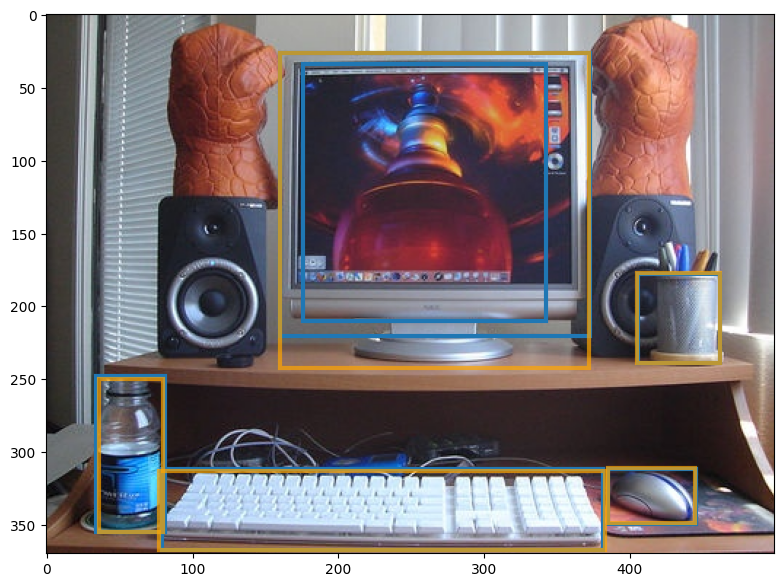

sorted tp = [1 1 1 1 0 1]
sorted fp = [0 0 0 0 1 0]
prec = [1.         1.         1.         1.         0.8        0.83333333]
rec = [0.2 0.4 0.6 0.8 0.8 1. ]
ap = 0.9666666666666667


In [12]:
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib import patches
import numpy as np

# YOLO의 객체 탐지 추론 결과 (coco dataset 기준)
# data/VOC2012/JPEGImages/2007_000559.jpg 이미지의 YOLO 추론 결과
pred_class = ['person', 'mouse', 'keyboard', 'bottle', 'cup', 'tvmonitor']

# 실제 추론결과에 맞도록 데이터를 수정하세요.
confidence = np.array([0.7952806, 0.9976528, 0.9980576, 0.9573481, 0.49765933, 0.9629159])
pred_box = np.array(
    [[176.16505921, 33.64296697, 341.38774166, 208.91536349],
     [385.4623735, 311.9840765, 444.85818948, 348.11093758],
     [79.10724729, 311.60360575, 380.4496864, 366.52458648],
     [33.86356309, 247.92885244, 79.78276448, 354.13598821],
     [405.60171008, 177.75161535, 461.23234462, 238.10186431],
     [159.76904333, 26.10973097, 371.53357512, 219.45996917]]
)

ans10 = confidence[0]
ans11 = pred_box[1][0]

# data/VOC2012/JPEGImages/2007_000559.jpg 이미지의 Ground Truth
y_class = ['bottle', 'tvmonitor', 'keyboard', 'cup', 'mouse']
y_box = np.array(
    [[36, 250, 79, 354],  # bottle 이 부분을 수정하세요
     [160, 26, 371, 241],  # tvmonitor 이 부분을 수정하세요
     [77, 313, 382, 366],  # keyboard
     [405, 177, 461, 238],  # cup
     [385, 311, 444, 348]]  # mouse
    , dtype='float64'
)

ans12 = y_box[0:2]

img_url = 'https://user-images.githubusercontent.com/38934308/141396886-34953093-8fb6-4984-a0e9-3598ba802828.jpg'
img_path = keras.utils.get_file("2007_000559.jpg", img_url)
image = mp_image.imread(img_path)
fig, ax = plt.subplots(figsize=(10, 7))
for box in pred_box:
    ax.add_patch(patches.Rectangle(
        (box[0], box[1]), box[2] - box[0] + 1, box[3] - box[1] + 1,
        edgecolor='tab:blue', linewidth=3,
        fill=False
    ))
for box in y_box:
    ax.add_patch(patches.Rectangle(
        (box[0], box[1]), box[2] - box[0] + 1, box[3] - box[1] + 1,
        edgecolor='orange', linewidth=3, alpha=0.7,
        fill=False
    ))
plt.imshow(image)
plt.show()


# 두 개의 bounding box의 iou 계산
def bbox_iou(box1, box2):
    # box의 넓이 계산: area = w * h
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # 교집합 box의 upper-left 좌표
    left_up = np.maximum(box1[:2], box2[:2])
    # 교집합 box의 lower-right 좌표
    right_down = np.minimum(box1[2:], box2[2:])

    # 교집합 box의 width와 height
    inter_section = np.maximum(right_down - left_up, 0.0)

    # 교집합 box의 넓이: area = w * h
    inter_area = inter_section[0] * inter_section[1]

    # 합집합 면적
    union_area = box1_area + box2_area - inter_area

    # IOU의 산출
    iou = inter_area / union_area
    return iou


# 교집합 box의 upper-left 좌표와 lower-right좌표를 산출하는 원리를 적어주세요.
ans13 = """
upper-left 좌표는 두 box의 좌상단 좌표 중에서 큰 값을 취하고, lower-right 좌표는 두 box의 우하단 좌표 중에서 작은 값을 취합니다.
"""

# 어떤 경우에 right_down - left_up이 음수가 되는 지 확인해 봅시다.
ans14 = """
right_down - left_up이 음수가 되는 경우는 두 box가 겹치지 않는 경우입니다.
"""

tp = []
for p_c, p_b in zip(pred_class, pred_box):
    tp_tmp = 0
    for y_c, y_b in zip(y_class, y_box):
        if y_c == p_c and bbox_iou(p_b, y_b) > 0.5:
            tp_tmp = 1
            break
    tp.append(tp_tmp)

tp = np.array(tp)
# False Positive
fp = 1 - tp

npos = len(y_box)  # 총 GT의 갯수

# sort by confidence (confidence가 큰 순으로 정렬)
sorted_ind = np.argsort(-confidence)
tp = tp[sorted_ind]
fp = fp[sorted_ind]

print('sorted tp =', tp)
print('sorted fp =', fp)

# 누적 precision recall의 계산
fp = np.cumsum(fp)
tp = np.cumsum(tp)
rec = tp / float(npos)  # 누적 tp를 GT의 갯수로 나눔
prec = tp / (tp + fp)
print('prec =', prec)
print('rec =', rec)


# AP (average precision의 계산)
def voc_ap(rec, prec):
    # 양끝에 시작값과 끝값을 추가한다.
    # X축(recall)은 0과 1사이에 존재해야 하므로 양쪽 끝에 0,1을 추가한다.
    # Y축(precision)은 recall이 1일때 0값을 추가한다. (이것은 면적에 영향을 주지 않는다.)
    # Y축의 시작값은 0을 추가하지만 바로 아래부분의 precision이 항상 감소하도록 해야하는 조건
    # 때문에, 자동으로 변경될 것이다. (시작값은 recision의 최대값으로 변화하게 된다.)
    mrec = np.concatenate(([0.], rec, [1.]))
    mpre = np.concatenate(([0.], prec, [0.]))

    # precision graph가 항상 감소하도록 값을 보정한다.
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # PR 곡선아래의 면적을 계산하기 위해서 X축(recall)이 변화하는 지점을 찾는다.
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # 그리고 다음의 합계를 구한다.
    # sum ( (\Delta recall) * prec )
    # (\Delta recall)이란 X축(recall)에서 recall이 변화하는 양이다.
    # 즉, 직사각형의 밑변의 길이가 된다.
    # 여기에 Y축 높이(precision)값을 곱하면 직사각형의 넓이가 된다.
    # 이것을 모두 합(sum)하면, 그래프 하단의 넓이가 된다.
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


ap = voc_ap(rec, prec)
print('ap =', ap)

ans15 = ap

# 본 과제를 수행한 시간이나 기타 의견 등이 있으시면 적어 주세요. (공란으로 두셔도 됩니다.)
ans16 = """
여기에 적어주세요.
"""

**다음은 답안의 형식을 확인하는 코드입니다. 실행해서 오류가 없는 지 확인합시다.**

In [13]:
from tensorflow import keras

# 답안의 형식을 점검합니다.

error = False

try:
    if type(ans01) != str:
        raise
except:
    error = True
    print('ans01 error')

try:
    if type(ans02) != str:
        raise
except:
    error = True
    print('ans02 error')

try:
    if type(ans03) != str:
        raise
except:
    error = True
    print('ans03 error')

try:
    if type(ans04) != str:
        raise
except:
    error = True
    print('ans04 error')

try:
    if ans05.inputs[0].shape.as_list() != [None, 28, 28]:
        raise
except:
    error = True
    print('ans05 error')

try:
    if type(ans06) != float:
        raise
except:
    error = True
    print('ans06 error')

try:
    if type(ans07) != float:
        raise
except:
    error = True
    print('ans07 error')

try:
    if type(ans08) != str:
        raise
except:
    error = True
    print('ans08 error')

try:
    if type(ans09) != str:
        raise
except:
    error = True
    print('ans09 error')

try:
    if not isinstance(ans10, np.float64):
        raise
except:
    error = True
    print('ans10 error')

try:
    if not isinstance(ans10, np.float64):
        raise
except:
    error = True
    print('ans11 error')

try:
    if not isinstance(ans12, np.ndarray):
        raise
except:
    error = True
    print('ans12 error')

try:
    if type(ans13) != str:
        raise
except:
    error = True
    print('ans13 error')

try:
    if type(ans14) != str:
        raise
except:
    error = True
    print('ans14 error')

try:
    if not isinstance(ans15, np.float64):
        raise
except:
    error = True
    print('ans15 error')

if error:
    print('답안을 확인하여 주세요')
else:
    print('답안의 형식 확인이 완료되었습니다.')

답안의 형식 확인이 완료되었습니다.


# 과제 제출 방법

1. **런타임** -> **다시 시작 및 모두 실행**을 수행하여 정상적으로 결과가 출력되는 지 다시 한번 확인합니다.  

2. **수정** -> **모든 출력 지우기**를 선택하여 cell의 출력을 지웁니다.

3. **파일** -> **`.ipynb`** 다운로드를 선택하여 노트북을 다운로드 합니다.

4. 파일 이름을 학번으로 변경합니다. 예) `202099999.ipynb`

5. 노트북 파일을 제출하시면 됩니다.